# Project-1 (Salary)

In [131]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [132]:
#Let's load the salary data set
salary=pd.read_csv('salary.csv')

In [133]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Exploratory Data Analysis

In [134]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [135]:
#Let's check for the missing values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

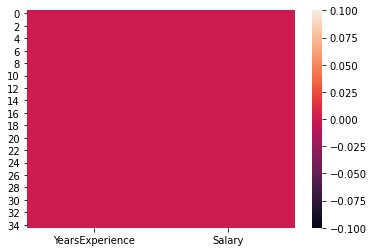

In [136]:
sns.heatmap(salary.isnull())
plt.show()

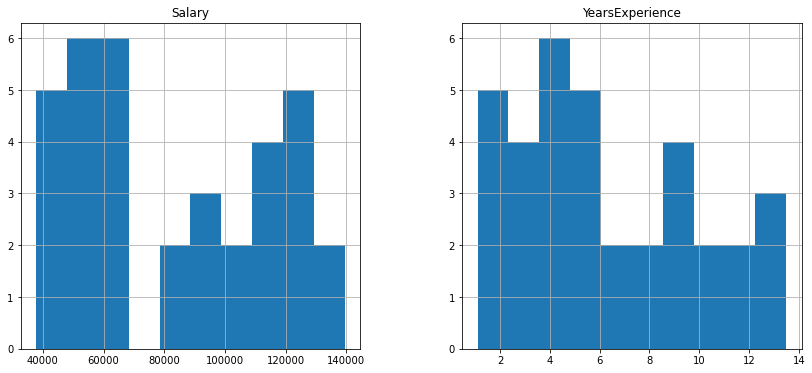

In [137]:
# Let's check the distribution of all numeric variables
salary.hist(figsize=(14,6));

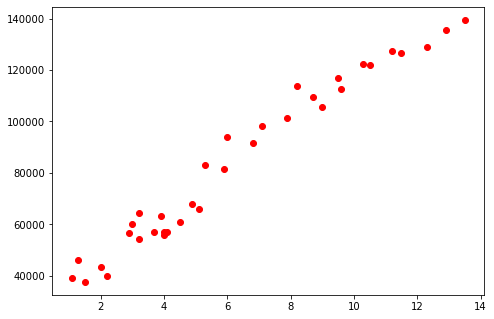

In [138]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [139]:
#let's check the correlation matrix
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


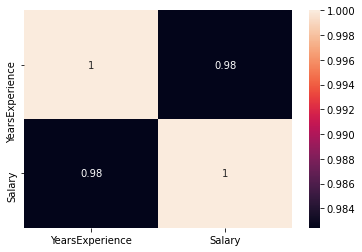

In [140]:
cor=salary.corr()
sns.heatmap(cor,annot=True)

In [141]:
#Let's describe the matrix
salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [142]:
#Let's split the data into test and training

x=salary.iloc[:,:1].values
y=salary.iloc[:,1:].values

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [144]:
# Let's create a funtion with machine learing  model

def models(x_train, y_train):
    # use linear Regression
    from sklearn.linear_model import LinearRegression
    lin=LinearRegression()
    lin.fit(x_train,y_train)

    #use KNEighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(Linear Kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decission Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Linear Regression Training Accuracy',lin.score(x_train,y_train))
    print('[1]K Neighbor Training Accuracy',knn.score(x_train,y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Training Accuracy',gauss.score(x_train,y_train))
    print('[5]Decission Tree Training Accuracy',tree.score(x_train,y_train))
    print('[6]Random Forest Training Accuracy',forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [145]:
#Let's get and train all of the model

model=models(x_train,y_train)

[0]Linear Regression Training Accuracy 0.9638371903672509
[1]K Neighbor Training Accuracy 0.14285714285714285
[2]SVC Linear Training Accuracy 0.9285714285714286
[3]SVC RBF Training Accuracy 0.9285714285714286
[4]Gaussian NB Training Accuracy 0.9285714285714286
[5]Decission Tree Training Accuracy 0.9285714285714286
[6]Random Forest Training Accuracy 0.8571428571428571


In [146]:
pred=model[1].predict(x_test)
print(pred)
print("Predicted Values")

print('\n')

#Print the actuacl values
print(y_test)
print('Actual Values')

[105582  81363  57081 105582  98273  55794  55794]
Predicted Values


[[121872]
 [ 91738]
 [ 66029]
 [122391]
 [101302]
 [ 67938]
 [ 63218]]
Actual Values


In [147]:
#lets find pout the random state values with whihc our linear model learns maximum

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(2,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.3)
    log=linear_model.LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

print("Max r2 score corresponding to ",final_r_state,"is",max_r_score);

Max r2 score corresponding to  9 is 0.9782503329254436


In [150]:
#Let's make our final model with random score as 9

def models(x_train, y_train):
    # use linear Regression
    from sklearn.linear_model import LinearRegression
    lin=LinearRegression()
    lin.fit(x_train,y_train)

    #use KNEighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(Linear Kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decission Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    #use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
    #Print the training accuracy for each model
    print('[0]Linear Regression Training Accuracy',lin.score(x_train,y_train))
    print('[1]K Neighbor Training Accuracy',knn.score(x_train,y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Training Accuracy',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Training Accuracy',gauss.score(x_train,y_train))
    print('[5]Decission Tree Training Accuracy',tree.score(x_train,y_train))
    print('[6]Random Forest Training Accuracy',forest.score(x_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [151]:
#Let's get and train all of the model

model=models(x_train,y_train);

[0]Linear Regression Training Accuracy 0.9676465521284631
[1]K Neighbor Training Accuracy 0.125
[2]SVC Linear Training Accuracy 0.9583333333333334
[3]SVC RBF Training Accuracy 0.9583333333333334
[4]Gaussian NB Training Accuracy 0.9583333333333334
[5]Decission Tree Training Accuracy 0.9583333333333334
[6]Random Forest Training Accuracy 0.9166666666666666


In [152]:
#from sklearn.externals import joblib
import joblib

# save the model as pickle in a file
joblib.dump(models,'salary.pkl')

['salary.pkl']